# ACTIVIDAD 2

## GRUPO 2 - Carlos Gonzalez Van Liempt y Álvaro Farreny Boixader

<h2 style="font-size: 19px;color:#6DA0FF;font-family:Georgia, Times, 'Times New Roman', serif;letter-spacing: 3px;font-weight: normal">Twitter Web Scraping</h2>

In [ ]:
#pip install tweepy==4.12.0

In [ ]:
"""pip install tweepy==3.10.0
pip install tweepy==4.12.0"""

In [ ]:
#try:
#    import tweepy
#except ModuleNotFoundError:
#    !pip install tweepy

In [ ]:
#pip install TextBlob

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import time
import nltk

BUSQUEDA DE LOS TWEETS QUE CONTENGAN BITCOIN

In [ ]:
df = pd.DataFrame(columns=['Autor', 'Contenido', 'Analisis'])

client = tweepy.Client(bearer_token="AAAAAAAAAAAAAAAAAAAAAIV9iAEAAAAABkMM0c9J7Qe1jgFj%2BbtdW4C9vkw%3DSaUUIEGcbOwfPRgWoDKJ6BP6RAJ7wOzpT7SuEskgByo3EWLB3d") # Utilizamos el token Bearer para autentificarnos en twitter

#INFORMACIÓN SOBRE LOS VALORES QUE SE LE PUEDEN DAR A LA QUERY!!
# https://developer.twitter.com/en/docs/twitter-api/tweets/search/api-reference/get-tweets-search-all

query = "Bitcoin -is:retweet lang:en" # Introducimos con que mensajes queremos que filtre, junto con la condición de que no debe ser un retweet y el idioma debe ser en español
response = client.search_recent_tweets(query=query, max_results=50, tweet_fields=["lang"], expansions=["author_id"]) # realizamos la query con un límite de 20 tweets ( se puede modificar )

users = {u["id"]: u for u in response.includes["users"]} # Relacionamos el id de usuario con el nombre de usuario para crear una lista de usuarios con la que trabajar

for tweet in response.data:  
    if users[tweet.author_id]:
        # Crear un objeto de TextBlob con el texto del tweet
        twt = TextBlob(str(tweet))
        user = users[tweet.author_id]
        df = df.append({'Autor':user.username,'Contenido':str(tweet), 'Analisis':str(twt.sentiment)},ignore_index=True) # Introducimos los valores en el dataframe
#PRINTEAMOS EL DATAFRAME
df

FUNCIONAMIENTO DE LA LIBRERIA TEXTBLOB

Sentiment(polarity=0.625, subjectivity=0.6) es el resultado que devuelve el método sentiment de la librería TextBlob cuando se le aplica a un texto determinado.

La polaridad es un valor que indica el estado de ánimo o la opinión expresada en un texto, y va de -1 a 1, siendo -1 una opinión muy negativa, 0 una opinión neutral, y 1 una opinión muy positiva. Por otro lado, la subjetividad es un valor que indica el grado de subjetividad o objetividad del texto, y también va de 0 a 1, siendo 0 un texto muy objetivo y 1 un texto muy subjetivo.

En el ejemplo Sentiment(polarity=0.625, subjectivity=0.6), se puede observar que la polaridad es 0.625, lo que indica que el texto tiene una opinión positiva, pero no muy fuerte. Por otro lado, la subjetividad

In [ ]:
# Importar la librería necesaria
from textblob import TextBlob

# Crear un objeto de TextBlob con el texto del tweet
tweet = TextBlob("I love Bitcoin! I'm gonna buy right now")

# Mostrar el resultado del análisis de sentimientos
print(tweet.sentiment)

### ANALISIS DE LOS SENTIMIENTOS OBTENIDOS ANTERIORMENTE 

In [ ]:
# Inicializar variables para contar la cantidad de tweets por sentimiento
pos_tweets = 0
neg_tweets = 0
neu_tweets = 0

for tweet in response.data:  
    if users[tweet.author_id]:
        analysis = TextBlob(str(tweet))
        # Incrementar la cantidad de tweets con sentimiento positivo, negativo o neutral
        if analysis.sentiment.polarity > 0:
            pos_tweets += 1
        elif analysis.sentiment.polarity < 0:
            neg_tweets += 1
        else:
            neu_tweets += 1

# Crear un gráfico de barras con los resultados obtenidos
plt.bar(["Positivos", "Negativos", "Neutrales"], [pos_tweets, neg_tweets, neu_tweets])
plt.title("Sentimientos en tweets sobre Bitcoin")
plt.show()

OTRA FORMA DE ANALISIS

In [ ]:
# Inicializar una lista para almacenar los sentimientos en el tiempo
sentiments = []

In [ ]:
for tweet in response.data:  
    if users[tweet.author_id]:
        analysis = TextBlob(str(tweet))
        # Añadir el sentimiento del tweet a la lista
        sentiments.append(analysis.sentiment.polarity)
        
# Crear un gráfico de líneas con los resultados obtenidos
plt.plot(sentiments)
plt.title("Sentimientos en tweets sobre Bitcoin")
plt.show()

<h2 style="font-size: 19px;color:#6DA0FF;font-family:Georgia, Times, 'Times New Roman', serif;letter-spacing: 3px;font-weight: normal">CSV Tweet Scraping</h2>

##### Utilizamos Pandas para cargar los datos del archivo .csv que hemos obtenido de kaggle
https://www.kaggle.com/datasets/alaix14/bitcoin-tweets-20160101-to-20190329

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [88]:
df = pd.read_csv('./data/tweetsKaggle.csv',sep=';', nrows=1000000, usecols=['timestamp','text'])
df.head()

,timestamp,text
0,2019-05-27 11:49:14+00,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27 11:49:18+00,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...
3,2019-05-27 11:49:22+00,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27 11:49:23+00,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [89]:
df[['Date','Time']] = df.timestamp.str.split(expand=True)
df.head()

,timestamp,text,Date,Time
0,2019-05-27 11:49:14+00,È appena uscito un nuovo video! LES CRYPTOMONN...,2019-05-27,11:49:14+00
1,2019-05-27 11:49:18+00,Cardano: Digitize Currencies; EOS https://t.co...,2019-05-27,11:49:18+00
2,2019-05-27 11:49:06+00,Another Test tweet that wasn't caught in the s...,2019-05-27,11:49:06+00
3,2019-05-27 11:49:22+00,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,2019-05-27,11:49:22+00
4,2019-05-27 11:49:23+00,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,2019-05-27,11:49:23+00


In [90]:
df=df[['Date','text']]
df.head()

,Date,text
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27,Another Test tweet that wasn't caught in the s...
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [91]:
df = df.dropna()
df.head()

,Date,text
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...
2,2019-05-27,Another Test tweet that wasn't caught in the s...
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...


In [92]:
#nltk.download("vader_lexicon")
analyzer = SentimentIntensityAnalyzer()
sentimientos = []
for texto in df['text']:
    sentiment = analyzer.polarity_scores(texto)
    analisis = sentiment['compound']
    sentimientos.append(analisis)
    
df['sentimientos'] = sentimientos

In [93]:
df['sentimientos']

0         0.0000
1        -0.1027
2         0.0000
3         0.0000
4         0.3612
           ...  
999995   -0.7845
999996    0.9429
999997    0.0000
999998   -0.4717
999999    0.5106
Name: sentimientos, Length: 1000000, dtype: float64

In [94]:
df.head()

,Date,text,sentimientos
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...,0.0000
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,-0.1027
2,2019-05-27,Another Test tweet that wasn't caught in the s...,0.0000
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,0.0000
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,0.3612


In [95]:
df = df.drop('text', axis=1)
df.head()

,Date,sentimientos
0,2019-05-27,0.0000
1,2019-05-27,-0.1027
2,2019-05-27,0.0000
3,2019-05-27,0.0000
4,2019-05-27,0.3612


In [96]:
df = df.groupby(by='Date').sum()

In [97]:
df.head

<bound method NDFrame.head of             sentimientos
Date                    
2009-01-11        0.0000
2011-01-09       -0.3400
2011-04-14       -0.4215
2011-05-10        0.7096
2011-05-14        0.3612
...                  ...
2019-05-23        1.8920
2019-05-24        0.9614
2019-05-25        7.2337
2019-05-26       24.7429
2019-05-27      781.1298

[2044 rows x 1 columns]>

In [98]:
 ## porque me lo pone en una columna todo!!! 200 rows × 1 columns

<AxesSubplot:title={'center':'Título del gráfico'}, xlabel='Fecha', ylabel='Suma de valores'>

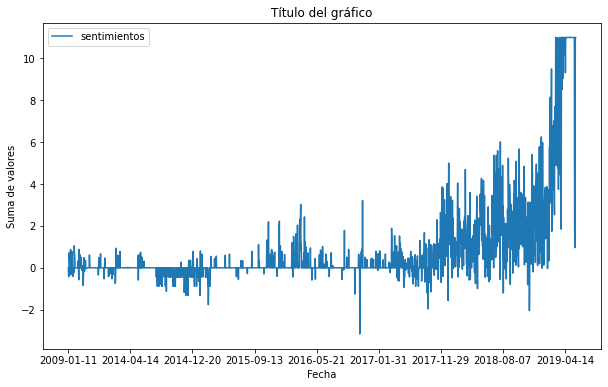

In [99]:
df2 = df.clip(upper=1500)
df2.plot(kind='line', title='Título del gráfico', xlabel='Fecha', ylabel='Suma de valores', figsize=(10,6))

<AxesSubplot:title={'center':'Título del gráfico'}, xlabel='Fecha', ylabel='Suma de valores'>

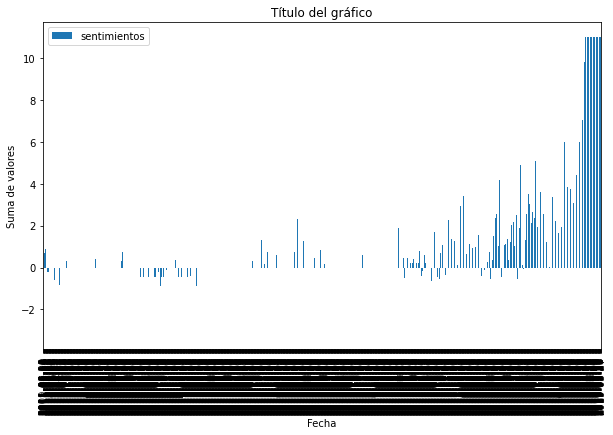

In [108]:
df2.plot(kind='bar', title='Título del gráfico', xlabel='Fecha', ylabel='Suma de valores', figsize=(10,6))